# 교재 Part 6

In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import folium
from config.settings import DATA_DIR    # 그대로 사용해도 됨

In [3]:
# 데이터 파일을 불러오기
df = pd.read_excel('data/city_pop.xlsx')    # 시도별 전출입 인구수
elec = pd.read_excel('data/elec_energy.xlsx')    # 남북한 전력 이용
auto = pd.read_csv('data/auto-mpg.csv', header=None)     # 자동차 정보
auto.columns = ['mpg', 'cylinders', 'displacement', 'hp', 'weight', 'acceleration', 'model_year', 'origin', 'name']
ttn = sns.load_dataset('titanic')
col = pd.read_excel('data/col_location.xlsx', index_col=0)     # 서울 대학교 위치정보
ggd = pd.read_excel('data/gg_pop.xlsx')        # 경기도 인구 정보
stock = pd.read_csv('data/stock.csv')
stock_d = pd.read_excel('data/stock-data.xlsx')
stock_p = pd.read_excel(DATA_DIR[0] + '/stock-price.xlsx')
stock_v = pd.read_excel(DATA_DIR[0] + '/stock-valuation.xlsx')

In [4]:
class Util:
    def add_10(n):
        return n + 10

    def add_both(a, b):
        return a + b
    
    def missing_values(series):
        return series.isnull()
    
    def min_max(series):
        return series.max() - series.min()
    
    def kpl_cyl(mpg, cyl):
        return mpg * 1.6/3.7 + cyl
    
    def info(df):
        return df.info()           
    
    def f_sum(df, axis=0):   # 여기에 axis=0, 1을 입력하면,1
        return df.sum(axis)  # 여기에도 키워드 argument로 적용되어서 axis=0, 1로 인식되는 것 아님. 그냥 0, 1로 인식되는데, 첫번째 argument가 axis라서 문제가 안되는 것
    
    def zscore(x):
        return (x - x.mean()) / x.std()

## Apply - Series에 elementwise / Dataframe에 serieswise로 함수 적용

In [104]:
class P6:
    def p218(self):
        df = ttn.loc[:, ['age', 'fare']]
        df['ten'] = 10
        print(df)

        # Apply 함수 - Series에 적용
        sr1 = df['age'].apply(Util.add_10)
        #print(sr1)
        sr2 = df['age'].apply(Util.add_both, b=10)
        #print(sr2)
        sr3 = df['age'].apply(lambda x: Util.add_10(x))         # x = df['age']의 element
        #print(sr3)          # sr1, 2, 3 모두 같은 결과
  

        # Dataframe에도 적용 가능
        x = ttn.loc[:, ['age', 'fare']]
        df0 = x.apply(Util.add_10, axis=0)       # axis=0: column-wise
        #print(df0)
        df1 = x.apply(Util.add_10, axis=1)       # axis=1: row-wise
        #print(df1)   # df0과 같은 결과

        miss = x.apply(Util.missing_values, axis=1)    # axis=0, 1 모두 결과 같다
        #print(miss)
        
        
        # 어느 경우에 axis=0, 1이 차이를 보일까??
        diff0 = x.apply(Util.min_max, axis=0)
        #print(diff0)       # 각 열의 최대 - 최소
        
        diff1 = x.apply(Util.min_max, axis=1)
        #print(diff1)       # 각 행의 최대 - 최소
        
        
        add10 = df.apply(lambda x: Util.add_both(x['age'], x['ten']), axis=1)   # x=df의 각 행, 'age'는 series x의 index
        #print(add10)
        
        
if __name__ == '__main__':
    P6().p218()

      age     fare  ten
0    22.0   7.2500   10
1    38.0  71.2833   10
2    26.0   7.9250   10
3    35.0  53.1000   10
4    35.0   8.0500   10
..    ...      ...  ...
886  27.0  13.0000   10
887  19.0  30.0000   10
888   NaN  23.4500   10
889  26.0  30.0000   10
890  32.0   7.7500   10

[891 rows x 3 columns]
0      32.0
1      48.0
2      36.0
3      45.0
4      45.0
       ... 
886    37.0
887    29.0
888     NaN
889    36.0
890    42.0
Name: age, Length: 891, dtype: float64


In [20]:
class P6:
    def test(self):
        display(auto.head()) 
        
        # mpg컬럼에 kpl_cyl함수를 적용해서 kpl 컬럼을 추가하시오.
        #auto['kpl'] = auto['mpg'].apply(Util.kpl_cyl, cyl=auto['cylinders'])  # Series에 apply는 elementwise이기 때문에 cyl이 series이면 안된다
        auto['kpl'] = auto[['mpg']].apply(Util.kpl_cyl, cyl=auto['cylinders']) # Dataframe에 적용해서 serieswise로 적용되도록 함
        #display(auto.head())
       
        # 강사님 방법
        auto['kpl_t'] = auto.apply(lambda x: Util.kpl_cyl(x['mpg'], x['cylinders']) , axis=1)
        #display(auto.head())
        
if __name__ == '__main__':
    P6().test()

,mpg,cylinders,displacement,hp,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


,mpg,cylinders,displacement,hp,weight,acceleration,model_year,origin,name,kpl
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,15.783784
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,14.486486
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,15.783784
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,14.918919
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,15.351351


,mpg,cylinders,displacement,hp,weight,acceleration,model_year,origin,name,kpl,kpl_t
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,15.783784,15.783784
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,14.486486,14.486486
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,15.783784,15.783784
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,14.918919,14.918919
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,15.351351,15.351351


## Applymap - Dataframe에 elementwise로 함수 적용

In [21]:
class P6:
    def p221(self):
        df = ttn.loc[:, ['age', 'fare']]
        
        # Applymap 함수 - dataframe에 elementwise로 적용
        df1 = df.applymap(Util.add_10)
        print(df1)
        
        df2 = df.applymap(Util.min_max)   # 불가능
        print(df2)
    
if __name__ == '__main__':
    P6().p221()

      age     fare
0    32.0  17.2500
1    48.0  81.2833
2    36.0  17.9250
3    45.0  63.1000
4    45.0  18.0500
..    ...      ...
886  37.0  23.0000
887  29.0  40.0000
888   NaN  33.4500
889  36.0  40.0000
890  42.0  17.7500

[891 rows x 2 columns]


AttributeError: 'float' object has no attribute 'max'

## Pipe - Series/Dataframe 자체에 함수 적용

In [66]:
class P6:
    def p226(self):
        # Series에 적용
        #print(ttn['age'].pipe(max))
        
        # Dataframe에 적용
        #ttn.pipe(Util.info)
        
        # Pipe는 함수를 연속해서 사용할 때 유용
        result = ttn.pipe(Util.missing_values).pipe(Util.f_sum, axis=1).pipe(Util.f_sum)
        print(type(result))   # pipe 결과도 dataframe이라 연속해서 pipe 적용 가능
        print(result)
        
        #ttn.loc[:, ['age', 'fare']].pipe(Util.total)       # total 함수가 머야..............
        
        
if __name__ == '__main__':
    P6().p226()

<class 'numpy.int64'>
869


## 컬럼 순서 바꾸기
Index 순서를 정렬하고 싶으면, df.sort_index()를 사용할 수 있다.

In [99]:
class P6:
    def p229(self):
        # 1. 알파벳 순으로 컬럼 정렬
        df = ttn.loc[:, 'survived':'age']
        #print(df)
        #print(df.columns.values)            # list
        sorted_col = sorted(df.columns)     # sorted(): return list
        #print(sorted_col)                   # 알파벳 순으로 정렬됨
        sorted_df = df[sorted_col]          # 정렬된 순으로 컬럼을 불러온다
        #print(sorted_df)
        
        
        # 2. 역순으로 컬럼 정렬
        rev_col = reversed(df.columns)  
        print(rev_col)           # reversed object: 내용 보려면 list화 해야함
        rev_col = list(rev_col)
        print(rev_col)
        rev_df = df[rev_col]
        print(rev_df)
     
    
if __name__ == '__main__':
    P6().p229()

['age', 'sex', 'pclass', 'survived']
      age     sex  pclass  survived
0    22.0    male       3         0
1    38.0  female       1         1
2    26.0  female       3         1
3    35.0  female       1         1
4    35.0    male       3         0
..    ...     ...     ...       ...
886  27.0    male       2         0
887  19.0  female       1         1
888   NaN  female       3         0
889  26.0    male       1         1
890  32.0    male       3         0

[891 rows x 4 columns]


## 열 분리

In [128]:
class P6:
    def p232(self):
        print(stock_d.head())
        #print(stock_d['연월일'].dtypes)       # datetime64
        stock_d['연월일'] = stock_d['연월일'].astype('str')
        #print(stock_d.head())
        date = stock_d['연월일'].str.split('-')
        #print(date.head())
        #print(type(date))    # series
        
        # 연월일 분리
        stock_d['연'] = date.str.get(0)    # .str을 해야 각각 객체의 0번째에 접근할 수 있음
        stock_d['월'] = date.str.get(1)    
        stock_d['일'] = date.str.get(2)
        #display(stock_d.head())
        
        
        # 다시 Timestamp로 바꾸어서 연월일 분리
        stock_d['연월일'] = pd.to_datetime(stock_d['연월일'])
        stock_d['Year'] = stock_d['연월일'].dt.year
        stock_d['Month'] = stock_d['연월일'].dt.month
        stock_d['Day'] = stock_d['연월일'].dt.day
        #display(stock_d)
        
        
if __name__ == '__main__':
    P6().p232()

          연월일   당일종가  전일종가     시가     고가     저가     거래량     연   월   일
0  2018-07-02  10100   600  10850  10900  10000  137977  2018  07  02
1  2018-06-29  10700   300  10550  10900   9990  170253  2018  06  29
2  2018-06-28  10400   500  10900  10950  10150  155769  2018  06  28
3  2018-06-27  10900   100  10800  11050  10500  133548  2018  06  27
4  2018-06-26  10800   350  10900  11000  10700   63039  2018  06  26


>Difference: Using `split` returns month and day as '06' and '01', while using `datetime` returns as '6' and '1'.

## Filtering - 조건식 mask 이용

In [218]:
class P6:           # 다시확인???????????????????????????????
    def p234(self):
        m1 = (ttn['age'] >= 10) & (ttn['age'] < 20)         # 10대만 추림
        #display(ttn[m1])
        m2 = (ttn['age'] >= 10) & (ttn['sex'] == 'female')
        #display(ttn[m2])
        m3 = (ttn['age'] < 10) | (ttn['age'] >= 60)
        #display(ttn[m3]) 
        #display(ttn.loc[m3, ['age', 'sex', 'alone']])
        
        m4 = ttn['pclass'] == 1
        #display(ttn.loc[m4, ['pclass', 'age', 'sex']])
        m5 = ttn['pclass'] == 2
        #display(ttn[m4 | m5])
        
        
        # 출력 설정 변경 - 최대 열의 개수 지정해서 모든 열 볼 수 있도록함
        pd.set_option('display.max_columns', 20)
        
        
        # isin 함수
        tf = ttn['embark_town'].isin(['Southampton', 'Queenstown'])
        result = ttn[tf]
        #display(result.tail())
        
        
if __name__ == '__main__':
    P6().p234()

,survived,pclass,sex,age,sibsp,...,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,...,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,...,False,C,Southampton,yes,False
6,0,1,male,54.0,0,...,True,E,Southampton,no,True
9,1,2,female,14.0,1,...,False,NaN,Cherbourg,yes,False
11,1,1,female,58.0,0,...,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...
880,1,2,female,25.0,0,...,False,NaN,Southampton,yes,False
883,0,2,male,28.0,0,...,True,NaN,Southampton,no,True
886,0,2,male,27.0,0,...,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,...,False,B,Southampton,yes,True


## Dataframe 합치기 - Concat, Join, Merge

In [179]:
df1 = pd.DataFrame({'a': ['a0', 'a1', 'a2', 'a3'],
                    'b': ['b0', 'b1', 'b2', 'b3'],
                    'c': ['c0', 'c1', 'c2', 'c3']
                    }, index=[0, 1, 2, 3])

df2 = pd.DataFrame({'a': ['a2', 'a3', 'a4', 'a5'],
                    'b': ['b2', 'b3', 'b4', 'b5'],
                    'c': ['c2', 'c3', 'c4', 'c5'],
                    'd': ['d2', 'd3', 'd4', 'd5']
                    }, index=[2, 3, 4, 5])
    
display(df1)
display(df2)

,a,b,c
0,a0,b0,c0
1,a1,b1,c1
2,a2,b2,c2
3,a3,b3,c3


,a,b,c,d
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5


In [177]:
sr1 = pd.Series(['e0', 'e1', 'e2', 'e3'], name='e')     # index= [0, 1, 2, 3]
sr2 = pd.Series(['f0', 'f1', 'f2'], name='f', index=[3, 4, 5])
sr3 = pd.Series(['go', 'g1', 'g2', 'g3'], name='g')
print(sr1)
print(sr2)
print(sr3)

0    e0
1    e1
2    e2
3    e3
Name: e, dtype: object
3    f0
4    f1
5    f2
Name: f, dtype: object
0    go
1    g1
2    g2
3    g3
Name: g, dtype: object


### Concat - pd.concat()

In [188]:
class P6:
    def p239(self):
        # Concat 함수 - Dataframe
        r1 = pd.concat([df1, df2], axis=0, ignore_index=True, join='inner')   # igonore_index=True이면 해당 axis가 무조건 숫자 인덱스로 바뀜
        #display(r1)
    
        # Concat - Series
        r2 = pd.concat([df1, sr1], axis=1)
        display(r2)
        r3 = pd.concat([df1, sr2], axis=1, join='inner')
        #display(r3)
        r4 = pd.concat([df2, sr2], axis=1)
        #display(r4)
        r5 = pd.concat([df2, sr3], axis=1)
        #display(r5)
        
if __name__ == '__main__':
    P6().p239()

,a,b,c,e
0,a0,b0,c0,e0
1,a1,b1,c1,e1
2,a2,b2,c2,e2
3,a3,b3,c3,e3


,a,b,c,d,g
0,NaN,NaN,NaN,NaN,go
1,NaN,NaN,NaN,NaN,g1
2,a2,b2,c2,d2,g2
3,a3,b3,c3,d3,g3
4,a4,b4,c4,d4,NaN
5,a5,b5,c5,d5,NaN


### Merge - pd.merge()

In [242]:
class P6:
    def p245(self):
        # Merge 함수
        display(stock_p.head(), stock_v.head())
        df1 = pd.merge(stock_p, stock_v, how='inner')    # on 설정(default)
        display(df1)
        df2 = pd.merge(stock_p, stock_v, left_on='stock_name', right_on='name', how='right')   # left_on, right_on 설정
        #display(df2)
        df3 = pd.merge(stock_p, stock_v, left_index=True, right_index=True)    # left_index, right_index 설정
        #display(df3)
    
    
        # 5만원 미만인 종목에 대해서만 두 데이터프레임을 합친다
        p5 = stock_p[stock_p['price'] < 50000]
        #display(p5)
        df4 = pd.merge(p5, stock_v, on='id', how='inner')
        #display(df4)
        
        
if __name__ == '__main__':
    P6().p245()

,id,stock_name,value,price
0,128940,한미약품,59385.666667,421000
1,130960,CJ E&M,58540.666667,98900
2,138250,엔에스쇼핑,14558.666667,13200
3,139480,이마트,239230.833333,254500
4,142280,녹십자엠에스,468.833333,10200


,id,name,eps,bps,per,pbr
0,130960,CJ E&M,6301.333333,54068,15.695091,1.829178
1,136480,하림,274.166667,3551,11.489362,0.887074
2,138040,메리츠금융지주,2122.333333,14894,6.313806,0.899691
3,139480,이마트,18268.166667,295780,13.931338,0.860437
4,145990,삼양사,5741.000000,108090,14.283226,0.758627


,id,stock_name,value,price,name,eps,bps,per,pbr
0,130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068,15.695091,1.829178
1,139480,이마트,239230.833333,254500,이마트,18268.166667,295780,13.931338,0.860437
2,145990,삼양사,82750.000000,82000,삼양사,5741.000000,108090,14.283226,0.758627
3,185750,종근당,40293.666667,100500,종근당,3990.333333,40684,25.185866,2.470259
4,204210,모두투어리츠,3093.333333,3475,모두투어리츠,85.166667,5335,40.802348,0.651359


In [236]:
pd.merge(df1, df2, how='inner')    # inner의 경우 index가 유지되지 않음

,a,b,c,d
0,a2,b2,c2,d2
1,a3,b3,c3,d3


### Join - df1.join(df2)

In [214]:
class P6:
    def p252(self):
        # Join 함수
        # on: df의 "컬럼"이나 index level를 지정하면, other의 index에 겹쳐진다. 디폴트는 index-on-index
        st_p = stock_p.set_index('id')
        st_v = stock_v.set_index('id')
        #display(st_p, st_v)
        df1 = st_p.join(st_v, how='inner')
        #display(df1.head())
        
        # stock_p의 on=id와 st_v의 index를 겹치기 - index는 무조건 stock_p를 따른다
        df2 = stock_p.join(st_v, on='id', how='outer')
        #display(df2)
        
        # stock_v의 on=id와 st_p의 index를 겹치기
        df3 = stock_v.join(st_p, on='id', how='outer')
        #display(df3)
        
    
if __name__ == '__main__':
    P6().p252()

,id,name,eps,bps,per,pbr,stock_name,value,price
0.0,130960,CJ E&M,6301.333333,54068.0,15.695091,1.829178,CJ E&M,58540.666667,98900.0
1.0,136480,하림,274.166667,3551.0,11.489362,0.887074,NaN,NaN,NaN
2.0,138040,메리츠금융지주,2122.333333,14894.0,6.313806,0.899691,NaN,NaN,NaN
3.0,139480,이마트,18268.166667,295780.0,13.931338,0.860437,이마트,239230.833333,254500.0
4.0,145990,삼양사,5741.000000,108090.0,14.283226,0.758627,삼양사,82750.000000,82000.0
5.0,161390,한국타이어,5648.500000,51341.0,7.453306,0.820007,NaN,NaN,NaN
6.0,181710,NHN엔터테인먼트,2110.166667,78434.0,30.755864,0.827447,NaN,NaN,NaN
7.0,185750,종근당,3990.333333,40684.0,25.185866,2.470259,종근당,40293.666667,100500.0
8.0,204210,모두투어리츠,85.166667,5335.0,40.802348,0.651359,모두투어리츠,3093.333333,3475.0
9.0,207940,삼성바이오로직스,4644.166667,60099.0,89.790059,6.938551,NaN,NaN,NaN


> Only `concat` and `join` can combine more than 3 dataframes at once. Yet, in case `join`ing dataframes with overlapping column names, it's hard to make it, as `join` can only differentiate two overlapping columns(left suffix and right suffix). 

## Group 연산

In [292]:
class P6:
    def p254(self):
        df = ttn[['age', 'sex', 'class', 'fare', 'survived']]
        display(df.head())
        
        # Group 함수
        group = df.groupby(['class'])
        #print(group)           # DataFrameGroupBy object
        #for data in group:    # 만들어진 그룹을 반복 - (group 이름, group의 subframe) tuple이 group object
        #    display(data)
        #    print(type(data))
            
        
        # 원하는 class의 내용만 확인하기
        sec1 = group.get_group('Second')
        #print(sec1)
        
        group2 = df.groupby(['class', 'sex'])
        #for data in group2:
        #    print(data)
        th_female = group2.get_group(('Third', 'female'))
        #print(th_female)
        
        r1 = df.groupby(['class']).mean()
        #print(r1)
        
        # Dataframe으로 얻어진 결과는 loc 사용 가능
        r2 = df.groupby(['class', 'sex']).mean()
        #print(r2)
        #print(r2.loc['First'])               # indexing
        #print(r2.loc[('First', 'female')])   # multi-indexing
        
        
if __name__ == '__main__':
    P6().p254()

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0


('First',
       age     sex  class     fare  survived
 1    38.0  female  First  71.2833         1
 3    35.0  female  First  53.1000         1
 6    54.0    male  First  51.8625         0
 11   58.0  female  First  26.5500         1
 23   28.0    male  First  35.5000         1
 ..    ...     ...    ...      ...       ...
 871  47.0  female  First  52.5542         1
 872  33.0    male  First   5.0000         0
 879  56.0  female  First  83.1583         1
 887  19.0  female  First  30.0000         1
 889  26.0    male  First  30.0000         1
 
 [216 rows x 5 columns])

('Second',
       age     sex   class     fare  survived
 9    14.0  female  Second  30.0708         1
 15   55.0  female  Second  16.0000         1
 17    NaN    male  Second  13.0000         1
 20   35.0    male  Second  26.0000         0
 21   34.0    male  Second  13.0000         1
 ..    ...     ...     ...      ...       ...
 866  27.0  female  Second  13.8583         1
 874  28.0  female  Second  24.0000         1
 880  25.0  female  Second  26.0000         1
 883  28.0    male  Second  10.5000         0
 886  27.0    male  Second  13.0000         0
 
 [184 rows x 5 columns])

('Third',
       age     sex  class     fare  survived
 0    22.0    male  Third   7.2500         0
 2    26.0  female  Third   7.9250         1
 4    35.0    male  Third   8.0500         0
 5     NaN    male  Third   8.4583         0
 7     2.0    male  Third  21.0750         0
 ..    ...     ...    ...      ...       ...
 882  22.0  female  Third  10.5167         0
 884  25.0    male  Third   7.0500         0
 885  39.0  female  Third  29.1250         0
 888   NaN  female  Third  23.4500         0
 890  32.0    male  Third   7.7500         0
 
 [491 rows x 5 columns])

In [226]:
class P6:
    def p261(self):
        df = ttn[['age', 'sex', 'class', 'fare', 'survived']]
        s = df.groupby(['class']).std() 
        #print(s)
    
        # 각 그룹의 특정 컬럼에 접근
        s2 = df.groupby(['class'])['fare']            # SeriesGroupBy object
        #print(s2)
        #for s in s2:
        #    print(s)
        
        s3 = df.groupby(['class']).fare               # SeriesGroupBy
        #print(s3)
        
        s2 = df.groupby(['class'])['fare'].std() 
        #print(s2)
        s3 = df.groupby(['class']).fare.std()
        #print(s3)    # s2와 같은 결과
        
        s4 = df.groupby(['class'])[['fare']]         # 그대로 DataFrameGroupBy
        #print(s4)
        #for s in s4:
        #    print(s)         # fare컬럼 만이 아니라 전체 컬럼이 출력되어서 별 의미 없다..
            
        
        # Group 전체에 함수 적용 - agg 메소드-----------------------------------------------------------------------------
        r1 = df.groupby(['class']).agg(Util.min_max)   # 컬럼별 series-wise로 적용
        #print(r1)
        
        r2 = df.groupby(['class']).agg(['min', 'max'])    # multiple aggregation
        #print(r2)
        
        r3 = df.groupby(['class']).agg({'fare':['min', 'max'], 'age':'mean'})
        #print(r3)
        
        r31 = df.groupby(['class']).agg(lambda x: x.fare.max() - x.fare.min())    # x['fare']는 오류남..이유 모르겠음
        print(r31)           # fare컬럼의 max()-min()값을 모든 컬럼으로 propagate
        
        #r32 = df.groupby(['class']).agg(lambda x: x.info())    # x: class별 subframe
        #print(r32)
        
        
        # transform 메소드: 원본 dataframe의 index를 갖춘 dataframe 형태로 반환------------------------------------
        r4 = df.groupby(['class']).transform(Util.zscore)   # class별 subframe 중, object 타입인 sex, class를 제외하고 연산
        #print(r4)                                          # 그룹별 series-wise로 mean(), std()를 구해서 zscore를 구한 뒤 합친 것
        
        r5 = df.groupby(['class'])['age'].transform(Util.zscore)
        #print(r5)
        
        r6 = df.groupby(['class']).transform(lambda x: x)   # 합쳐서 반환할 때 grouping에 사용된 컬럼은 항상 배제된다
        #print(r6)       # class 컬럼 제외됨
        #print(df)
        
        #r7 = df.groupby(['class']).transform(Util.info)  # 출력 오류 메세지를 보면 series-wise로 적용되는 것을 알 수 있음!!!
        #print(r7)
        
        
        # filter 메소드--------------------------------------------------------------------------------------------
        r8 = df.groupby(['class']).filter(lambda x: len(x) >= 200)   # x: class별 데이터프레임
        #print(r8)        # First, Third class만 얻어짐. 원본 dataframe의 index 유지되고, grouping에 사용된 컬럼도 포함된다
        
        r9 = df.groupby(['class']).filter(lambda x: x['age'].mean() > 30)
        #print(r9)         # First class만 반환
        
        
        # apply 메소드---------------------------------------------------------------------------------------------
        # 다른 방법보다 느리기 때문에 다른 방법을 먼저 시도해보도록..
        # 함수 반환 결과에 따라 dataframe일 수도, series일 수도 있음
        r10 = df.groupby(['class']).apply(Util.zscore)    # transform 결과와 비교: object인 sex 컬럼도 NaN로 포함
        #print(r10)
        
        r11 = df.groupby(['class'])['age'].apply(Util.zscore)
        #print(r11)

        r12 = df.groupby(['class']).apply(lambda x: x.fare.max() - x.fare.min())     # x: class별 dataframe 
        print(r12)                                                         # agg 결과외 비교: propagate 하지 않고 series 반환
        
        r13 = df.groupby(['class']).apply(lambda x: x)    # grouping한 컬럼도 포함
        #print(r13)
        
        #r14 = df.groupby(['class']).apply(lambda x: x.info())
        #print(r14)
        
        r15 = df.groupby(['class']).apply(lambda x: x['age'].mean() > 30)   # filter 결과와 비교: t/f만 반환
        #print(r15)
        
        
if __name__ == '__main__':
    P6().p261()

             age       sex      fare  survived
class                                         
First   512.3292  512.3292  512.3292  512.3292
Second   73.5000   73.5000   73.5000   73.5000
Third    69.5500   69.5500   69.5500   69.5500
class
First     512.3292
Second     73.5000
Third      69.5500
dtype: float64


>Dataframe에 series를 +, - 연산하는 것은 row-wise로 계산된다(Day20_num_pan > pan11.py 참조)

## Multi-index

In [102]:
class P6:
    def p271(self):
        df = ttn[['age', 'sex', 'class', 'fare', 'survived']]
        grouped = df.groupby(['class', 'sex'])
        gdf = grouped. mean()
        print(gdf)                  # Dataframe
        #print(gdf.loc['First'])     # Dataframe
        #print(gdf.loc[('First', 'female')])      # Series
        
        # xs indexer
        #print(gdf.xs('First', level='class', drop_level=False))   # drop_level: indexing하는 level을 drop하고 반환할지 여부
        #print(gdf.xs('male', level='sex', drop_level=True))       # 등급별로 결과 출력
        
        # Series에서도 xs 사용 가능
        print(gdf['age'].xs('female', level=1, drop_level=False))
        

if __name__ == '__main__':
    P6().p271()

                     age        fare  survived
class  sex                                    
First  female  34.611765  106.125798  0.968085
       male    41.281386   67.226127  0.368852
Second female  28.722973   21.970121  0.921053
       male    30.740707   19.741782  0.157407
Third  female  21.750000   16.118810  0.500000
       male    26.507589   12.661633  0.135447
class   sex   
First   female    34.611765
Second  female    28.722973
Third   female    21.750000
Name: age, dtype: float64


## Pivot

### pd.pivot_table  - df에서 바로 pivot table을 만들 때

                    mean                                      max        \
                     age                   fare               age         
survived               0          1           0           1     0     1   
class  sex                                                                
First  female  25.666667  34.939024  110.604167  105.978159  50.0  63.0   
       male    44.581967  36.248000   62.894910   74.637320  71.0  80.0   
Second female  36.000000  28.080882   18.250000   22.288989  57.0  55.0   
       male    33.369048  16.022000   19.488965   21.095100  70.0  62.0   
Third  female  23.818182  19.329787   19.773093   12.464526  48.0  63.0   
       male    27.255814  22.274211   12.204469   15.579696  74.0  45.0   

                                 
                 fare            
survived            0         1  
class  sex                       
First  female  151.55  512.3292  
       male    263.00  512.3292  
Second female   26.00   65.0000  
       male

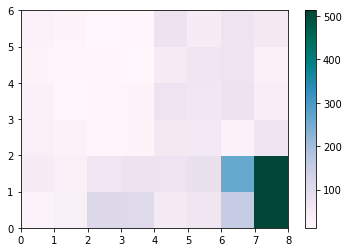

In [232]:
class P6:
    def p273(self):
        # 출력 옵션 변경
        pd.set_option('display.max_columns', 10)
        pd.set_option('display.max_rows', 20)
        
        df = ttn[['age', 'sex', 'class', 'fare', 'survived']]
        pv1 = pd.pivot_table(df, index='class', columns='sex', values='age', aggfunc='mean')
        #print(pv1)
        
        # aggfunc이 list인 경우, 컬럼이 multi-index가 되면서 상위가 function
        pv2 = pd.pivot_table(df, index='class', columns='sex', values='survived', aggfunc=['mean', 'sum'])   
        #print(pv2)     
        #print(pv2.columns)
        
        # 컬럼 multi-index 순서: function > values > column
        pv3 = pd.pivot_table(df, index=['class', 'sex'], columns='survived', values=['age', 'fare'], aggfunc=['mean', 'max'])
        print(pv3)
        #print(pv3.columns)
        #print(pv3.xs('First', level='class'))
        #print(pv3.xs(('First', 'female')))
        #print(pv3.xs('male', level='sex'))
              
        # Series로 반환가능한 상황인데 level을 같이 적어주면 drop_level=False처럼 작동한다 --> drop_level=True 설정해도 안 먹힘!
        #print(pv3.xs(('Second', 'male')))
        #print(pv3.xs(('Second', 'male'), level=[0, 1]))  # type: DataFrame
        #print(pv3.xs(('male', 'Second'), level=['sex', 'class'], drop_level=True))   # 위와 같은 결과
        
        # 컬럼을 추출하기
        #print(pv3.xs('mean', axis=1, drop_level=False))          
        #print(pv3.xs(('mean', 'age'), level=[0, 1], axis=1))
        
        #print(pv3.xs(('mean', 'age', 0), axis=1))                    # type: Series
        #print(pv3.xs(('mean', 'age', 0), level=[0, 1, 2], axis=1))   # level 지정하면 -> type: DataFrame
        
        #print(pv3.xs(1, level='survived', axis=1, drop_level=False))
        #print(pv3.xs('fare', level=1, axis=1))
        #print(pv3.xs(('max', 0), level=[0, 2], axis=1))
        
        
        # Heatmap 그리기-----------------------------------------------------------------------------------------------------
        plt.pcolor(pv3, cmap='PuBuGn')
        plt.colorbar()
        plt.show()
        

if __name__ == '__main__':
    P6().p273()

### pd.pivot - DataFrameGroupBy object에서 pivot을 만들 때
IBM3 Exprolatory Data Analysis 참고
* **Groupby**로 먼저 필요한 feature값에 대해 function aggregation을 해두어야 함
* 이후 **df.pivot**으로 reshape한 뒤 heatmap 등에 활용

                     age                   fare            
survived               0          1           0           1
class  sex                                                 
First  female  25.666667  34.939024  110.604167  105.978159
       male    44.581967  36.248000   62.894910   74.637320
Second female  36.000000  28.080882   18.250000   22.288989
       male    33.369048  16.022000   19.488965   21.095100
Third  female  23.818182  19.329787   19.773093   12.464526
       male    27.255814  22.274211   12.204469   15.579696


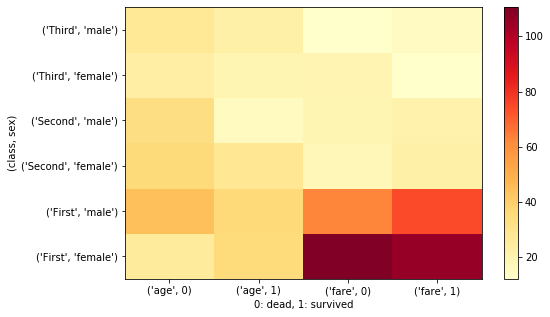

In [217]:
class P6:
    def extra(self):
        df = ttn[['age', 'sex', 'class', 'fare', 'survived']]
        
        # pivot 인수 index, columns는 컬럼에서 선택해야 하기 때문에 as_index=False 설정해야 함!
        gdf = df.groupby(['class', 'sex', 'survived'], as_index=False).mean()   
        #print(gdf)
        pv = gdf.pivot(index=['class', 'sex'], columns='survived')
        print(pv)
        
        # Multi-index의 한 레벨의 값만 가져오기
        #print(pv.index, pv.columns)   # index, col 모두 multi-index
        #print(pv.index.levels)     
        #print(pv.index.levels[0])    # 'class' -> type: CategoricalIndex, dtype: category
        #print(pv.columns.levels)
        
        
        # Heatmap 만들기 - Pseudocolor plot(bivariate density plot)------------------------------------------------------------
        #plt.pcolor(pv, cmap='YlOrRd')
        #plt.colorbar()
        #plt.show()
        
        fig, ax = plt.subplots(figsize=(8, 5))
        im = ax.pcolor(pv, cmap='YlOrRd')
        
        x_label = pv.columns
        y_label = pv.index
        
        ax.set_xticks(np.arange(pv.shape[1]) + 0.5)
        ax.set_yticks(np.arange(pv.shape[0]) + 0.5)
        
        ax.set_xticklabels(x_label)
        ax.set_yticklabels(y_label)
        
        ax.set_xlabel('0: dead, 1: survived')
        ax.set_ylabel('(class, sex)')
        
        fig.colorbar(im)
        plt.show()
    
if __name__ == '__main__':
    P6().extra()